## Imports & Configuration

In [28]:
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [87]:
# import data
data = pd.read_excel('Concrete_Data.xls')
features = data.columns[0:8]
label = data.columns[8]
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


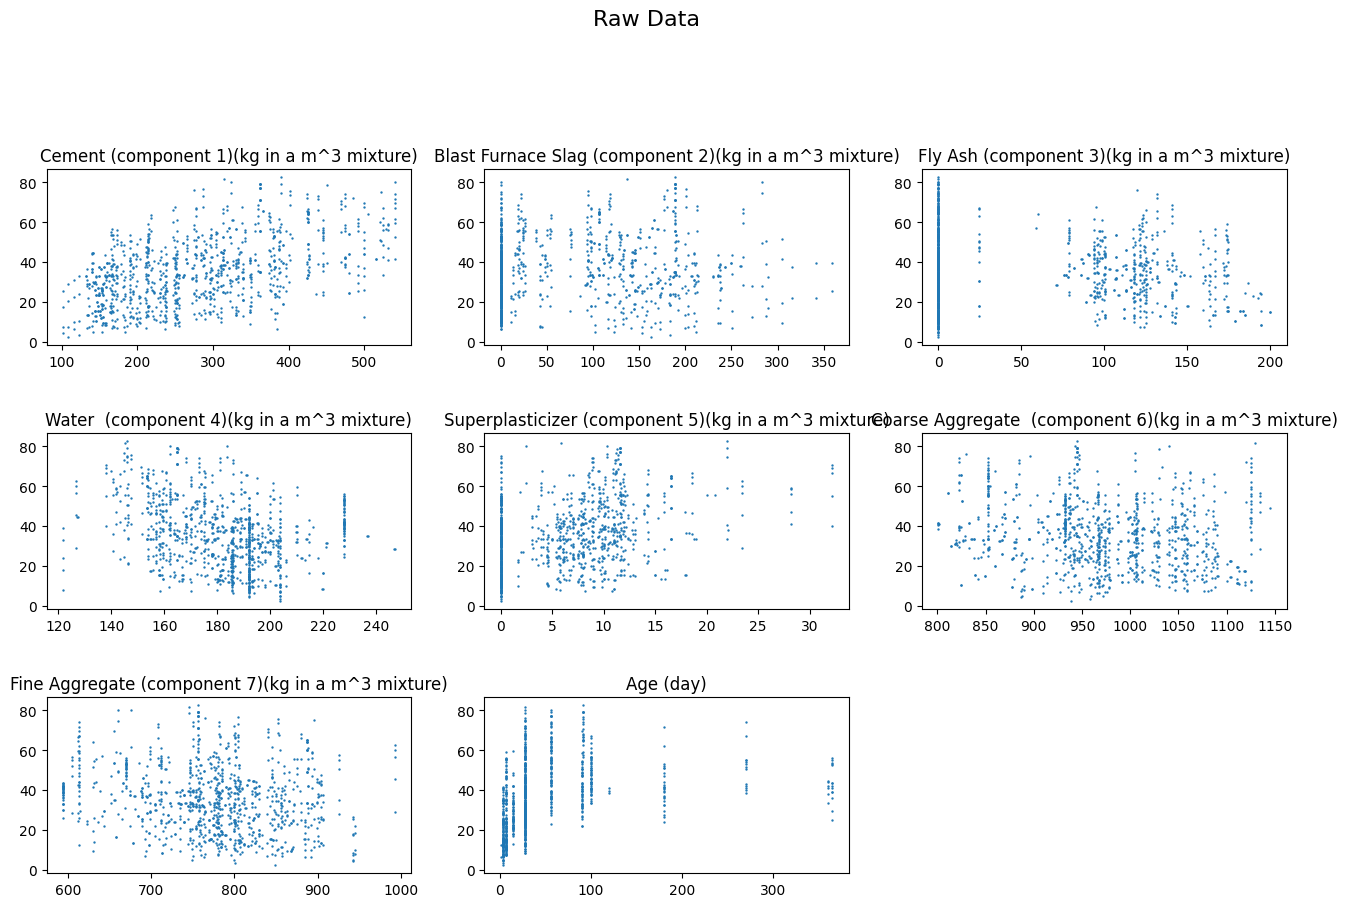

In [88]:
# visualize data - do for each of 8 independent variables (2x4 grid)

#x = data.values[:,index]
#y = data.values[:,8]

f = plt.figure(figsize=(16, 16))
f.subplots_adjust(hspace=0.5)
f.suptitle('Raw Data', fontsize=16)

# visualize the relationship of all varaibles and the price (y-axis)
for index, feature_name in enumerate(features):
    ax = f.add_subplot(5, 3, index + 1)
    ax.scatter(data.values[:, index], data.values[:,8], s=0.5)
    ax.set_title(feature_name)
    
plt.show()

## Data Pre-Processing

In [124]:
# check for null values
for feature in features:
    data[feature].isnull().sum()
    # no null values!
    
# create x and y variables for raw data
x_raw = data.values[:,:8]
y_raw = data.values[:,8]

# standardize data
    #scaler = StandardScaler()  
    #new = scaler.fit_transform(data)
new = np.empty((data.shape[1], data.shape[0]))
#print(new)
for index,f in enumerate(features):
    new[index] = (data[f] - data[f].mean()) / data[f].std()

# create x and y varaiables for new data
x_new = new[:,:8]
y_new = new[:,8]

## Training & Testing Data

In [126]:
# split into training & testing sets
N_raw = len(y_raw)
x_raw_train, x_raw_test, y_raw_train, y_raw_test = train_test_split(x_raw, y_raw, test_size=0.2, random_state=10)
N_new = len(y_new)
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, test_size=0.2, random_state=10)

## Univariate Linear Regression

In [148]:
#### randomly initialize m & b?

# initialize model
m = np.empty((data.shape[0],data.shape[1]-1))
b = np.empty(data.shape[0])
#n = len(data)
print(data.shape[0])

#### find loss function on initial model?
loss = [0]*len(features)
MSE = [0]*len(features)
for f in range(len(features)):
    for i in range(len(data)):
        loss[f] += y_new_train[i] - (np.dot(m[i,f],x_new_train[i,f]) + b[i])^2
    MSE[f] = loss[f] / n


1030


TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [146]:
# update m for each feature & each data point?
alpha = 0.1
for f in range(len(features)):
    for i in range(len(new)):
        m[i+1,f] = m[i,f] - alpha/n * np.sum(-2*new[i,f])*(y[i] - (m[i,f]*new[i,f]+b[i]))

## Multivariate Linear Regression

In [147]:
m = [[0 for x in range(data.shape[1]-1)] for x in range(data.shape[0])]
b = np.empty(data.shape[0])
#n = len(data)
print(data.shape[0])

#### find loss function on all features
loss = 0
for i in range(len(data)):
    loss += y[i] - (np.dot(m[i,:],new[i,:8]) + b[i])^2
MSE = loss / n

1030


TypeError: list indices must be integers or slices, not tuple

In [149]:
# update m for all features 
alpha = 0.1
for i in range(len(new)):
    m[i+1,:] = m[i,:] - alpha/n * np.sum(-2*new[i,:])*(y[i] - (m[i,:]*new[i,:]+b[i]))

ValueError: operands could not be broadcast together with shapes (8,) (1030,) 

## Results